In [213]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, accuracy_score

%matplotlib inline

In [215]:
raw_data = pd.read_csv("/content/drive/MyDrive/Database/algerian_forest_fires.csv", header=1)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


---
###<b> Data Cleaning Process


In [216]:
# missing values
raw_data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [217]:
# assigning encoding for regions
# 0 - Bejaia & 1 - Sidi-Bel Abbes

raw_data.loc[:122, "Region"] = 0
raw_data.loc[122:, "Region"] = 1

In [218]:
raw_data[['Region']] = raw_data[['Region']].astype(int)

In [219]:
raw_data = raw_data.dropna().reset_index(drop=True)

In [220]:
raw_data = raw_data.drop(122).reset_index(drop=True)

In [221]:
raw_data.columns = raw_data.columns.str.strip()

In [222]:
# converting to int type for model
raw_data[['month','day','year','Temperature','RH','Ws']] = raw_data[['month','day','year','Temperature','RH','Ws']].astype(int)

In [223]:
objects = [features for features in raw_data.columns if raw_data[features].dtypes=='O']
for i in objects:
    if i!='Classes':
        raw_data[i] = raw_data[i].astype(float)

In [224]:
cleaned_data = raw_data
cleaned_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [225]:
cleaned_data['Classes']=np.where(cleaned_data['Classes'].str.contains('not fire'),'not fire','fire')

---
###<b> Exploratory Data Analysis

In [226]:
data = cleaned_data.drop(['day','month','year'],axis=1)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 1.0, 'Fire Analysis of Sidi - Bel Regions')

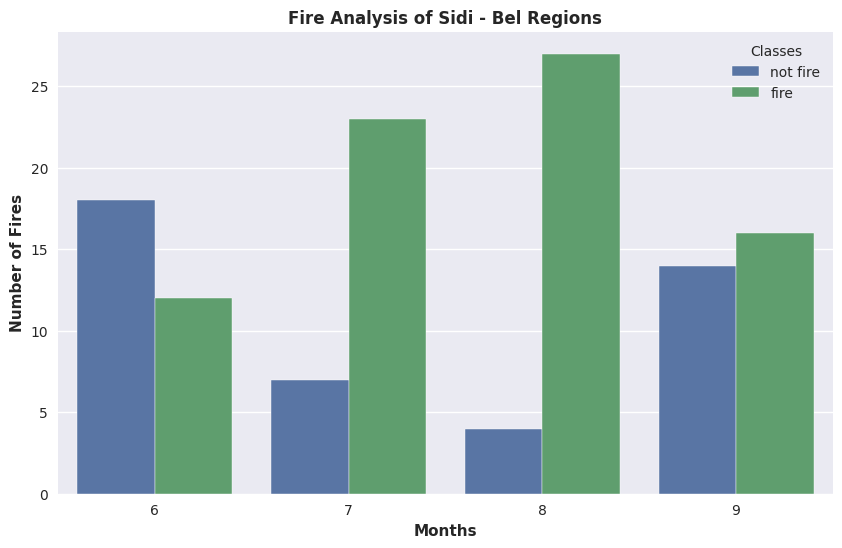

In [227]:
# monthly fire analysis
data_temp = cleaned_data.loc[cleaned_data['Region'] == 1]
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=data_temp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Sidi - Bel Regions", weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

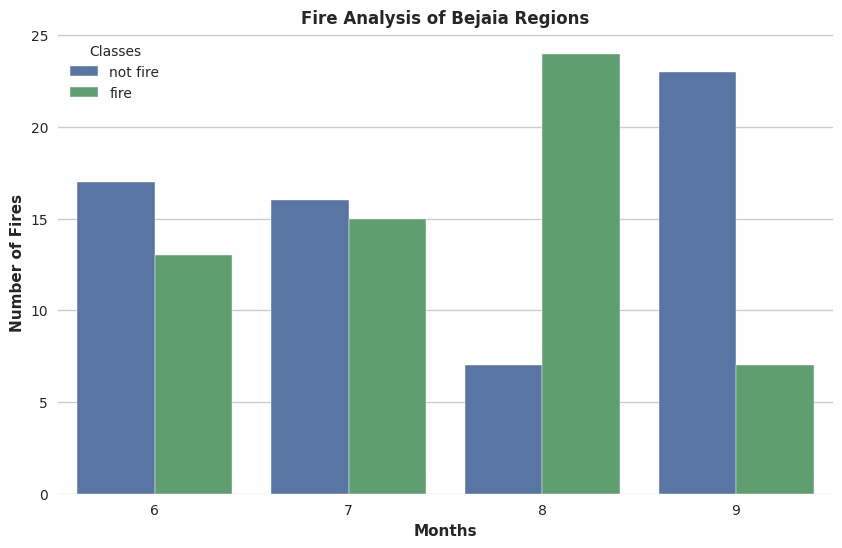

In [228]:
# monthly fire analysis
data_temp = cleaned_data.loc[cleaned_data['Region'] == 0]
plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=data_temp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Fire Analysis of Bejaia Regions", weight='bold')

In [229]:
# encoding the categories into numerics 0 & 1
data['Classes'] = np.where(data['Classes'].str.contains('not fire'), 0, 1)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


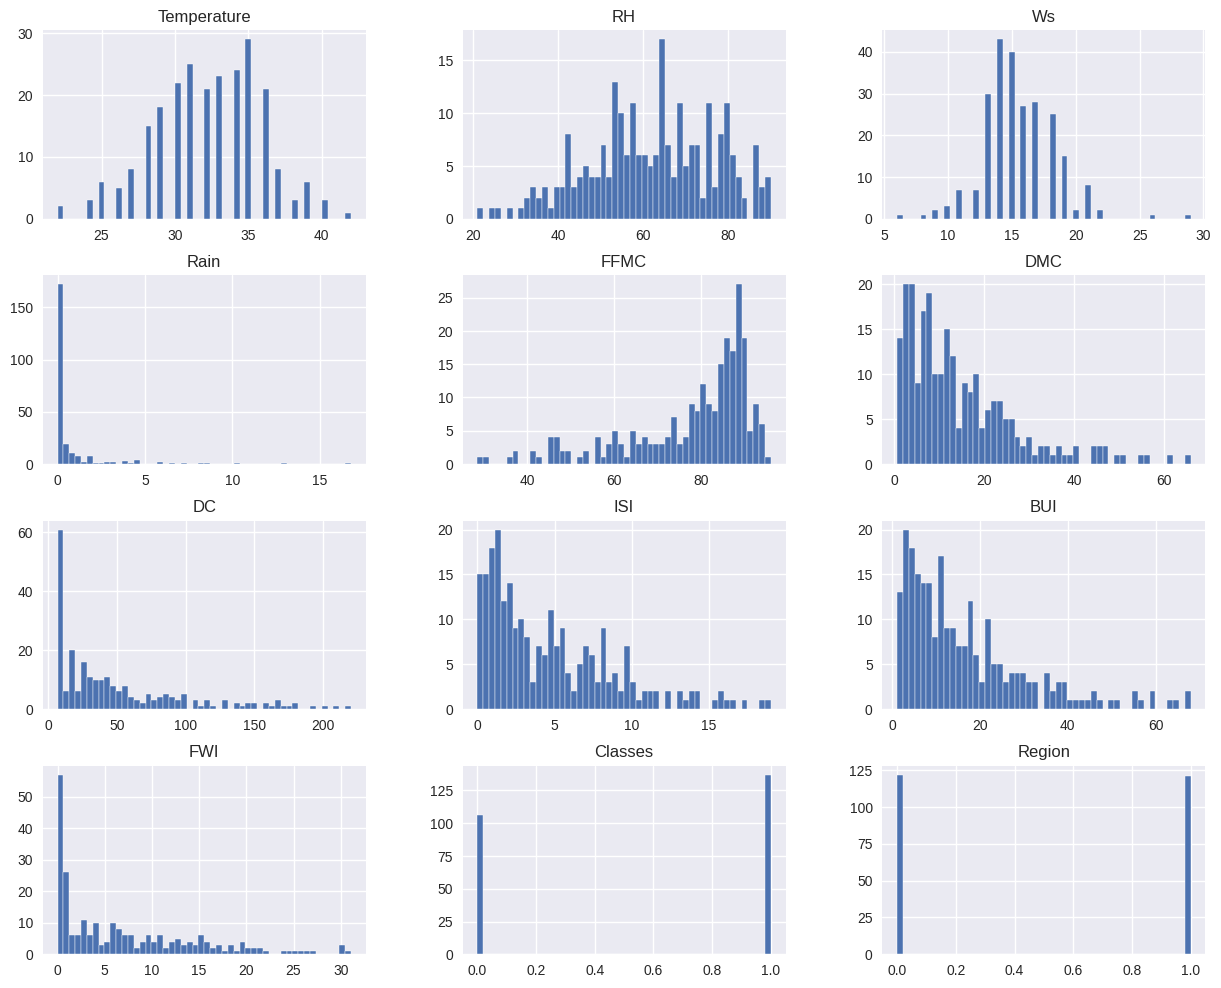

In [230]:
# density plots for all features
plt.style.use('seaborn')
data.hist(bins = 50, figsize = (15, 12))
plt.show()

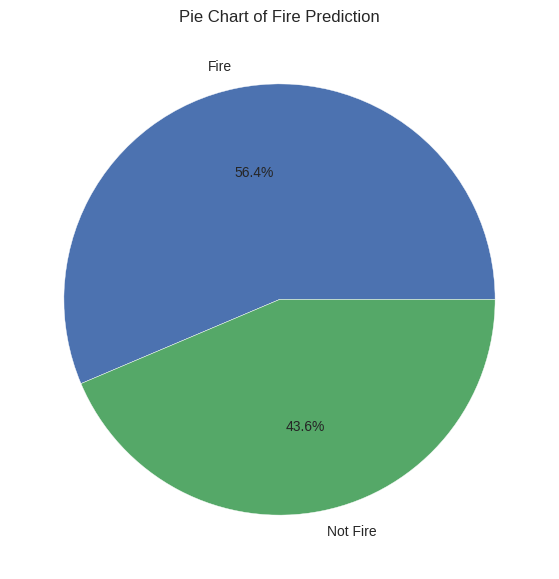

In [231]:
# classes pie chart
percentage = data['Classes'].value_counts(normalize=True)*100
classlabels = ["Fire","Not Fire"]
plt.figure(figsize=(10,7))
plt.pie(percentage, labels = classlabels, autopct='%1.1f%%')
plt.title("Pie Chart of Fire Prediction")
plt.show()

<Axes: >

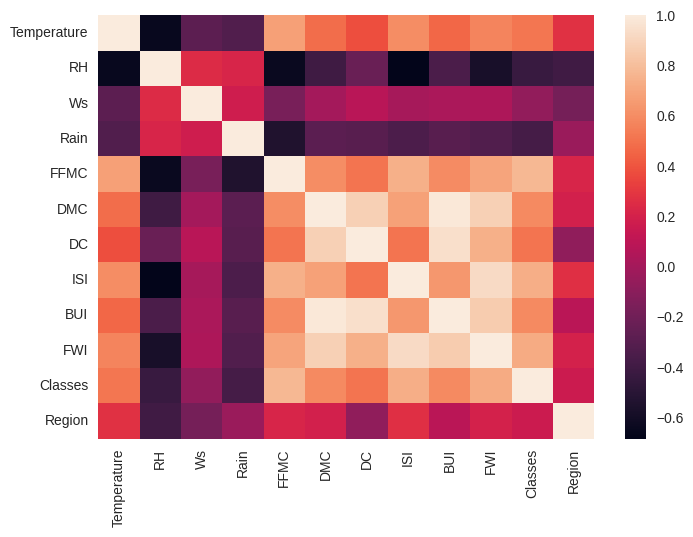

In [232]:
# Correlation for feature_selection
sns.heatmap(data.corr())

<Axes: xlabel='FWI'>

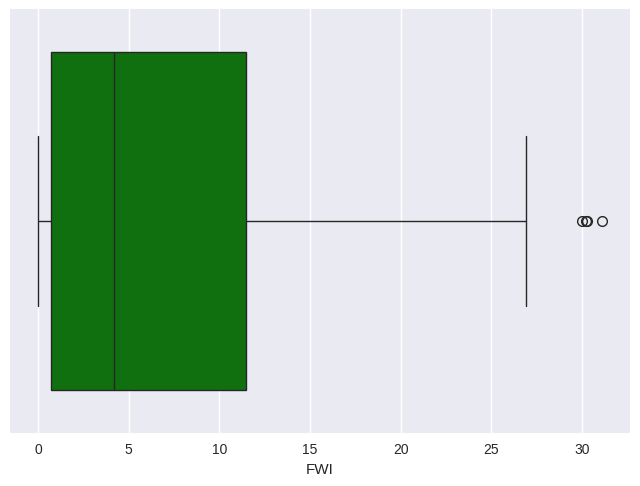

In [233]:
sns.boxplot(data['FWI'], color='green', orient='h')

---
###<b>Pre - processing Data :

In [234]:
X = data.drop('FWI', axis=1)
y = data['FWI']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [236]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [237]:
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [238]:
corr_features = correlation(X_train,0.85)

In [239]:
# drop features less than threshold

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [240]:
# feature scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

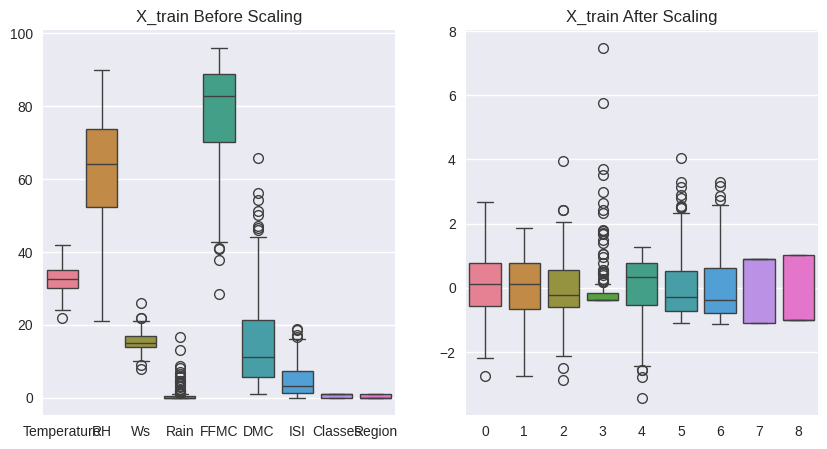

In [241]:
# understand effect of scaling

plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [243]:
# linear regression model

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5468236465249986
R2 Score 0.9847657384266951


In [245]:
# lasso model

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


In [246]:
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)


Mean absolute error 0.6199701158263433
R2 Score 0.9820946715928275


In [ ]:
lassocv.alpha_

In [247]:
# Ridge model

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


In [248]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


In [ ]:
ridgecv.get_params()

In [249]:
# Elastic Net model
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


In [251]:
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


In [256]:
# set for logistic regression
X = data.drop('Classes', axis=1)
y = data['Classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [258]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Mean absolute error 0.0
R2 Score 0.9877
Accuracy Score :  0.998877
